In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\deivi\AppData\Local\Temp\ipykernel_20536\2259232837.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv(r"C:\Users\deivi\Downloads\archive (4)\king_ country_ houses_aa.csv")
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
high_value_properties = data[data['price'] >= 650000]
high_value_properties['date'] = pd.to_datetime(high_value_properties['date'], format='%Y%m%dT%H%M%S')
high_value_properties['year_sold'] = high_value_properties['date'].dt.year
high_value_properties['month_sold'] = high_value_properties['date'].dt.month
high_value_properties['day_sold'] = high_value_properties['date'].dt.day

def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'
    
high_value_properties['season_sold'] = high_value_properties['month_sold'].apply(get_season)
high_value_properties['house_age'] = high_value_properties['year_sold'] - high_value_properties['yr_built']
high_value_properties['years_since_renovation'] = np.where(high_value_properties['yr_renovated'] > 0, high_value_properties['year_sold'] - high_value_properties['yr_renovated'], 0)
high_value_properties['price_per_sqft'] = high_value_properties['price'] / high_value_properties['sqft_living']
high_value_properties['bathrooms'] = high_value_properties['bathrooms'].round().astype(int)
high_value_properties['bed_bath_rooms'] = high_value_properties['bedrooms'] * high_value_properties['bathrooms']
high_value_properties['sqft_grade'] = high_value_properties['sqft_living'] * high_value_properties['grade']
high_value_properties['sqft_lot_grade'] = high_value_properties['sqft_lot'] * high_value_properties['grade']
high_value_properties['zipcode'] = high_value_properties['zipcode'].astype('category')
high_value_properties['is_waterfront'] = high_value_properties['waterfront'].apply(lambda x: 1 if x == 1 else 0)
high_value_properties['is_renovated'] = high_value_properties['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

C:\Users\deivi\AppData\Local\Temp\ipykernel_20536\1802531703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_value_properties['date'] = pd.to_datetime(high_value_properties['date'], format='%Y%m%dT%H%M%S')
C:\Users\deivi\AppData\Local\Temp\ipykernel_20536\1802531703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_value_properties['year_sold'] = high_value_properties['date'].dt.year
C:\Users\deivi\AppData\Local\Temp\ipykernel_20536\1802531703.py:4: SettingWithCopyWarning: 
A value is trying

In [4]:
high_value_properties.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,day_sold,season_sold,house_age,years_since_renovation,price_per_sqft,bed_bath_rooms,sqft_grade,sqft_lot_grade,is_waterfront,is_renovated
5,7237550310,2014-05-12,1225000.0,4,4,5420,101930,1.0,0,0,...,12,Spring,13,0,226.014760,16,59620,1121230,0,0
10,1736800520,2015-04-03,662500.0,3,2,3560,9796,1.0,0,0,...,3,Spring,50,0,186.095506,6,28480,78368,0,0
15,9297300055,2015-01-24,650000.0,4,3,2950,5000,2.0,0,3,...,24,Winter,36,0,220.338983,12,26550,45000,0,0
21,2524049179,2014-08-26,2000000.0,3,3,3050,44867,1.0,0,4,...,26,Summer,46,0,655.737705,9,27450,403803,0,0
26,1794500383,2014-06-26,937000.0,3,2,2450,2691,2.0,0,0,...,26,Summer,99,0,382.448980,6,19600,21528,0,0


In [5]:
missing_values = high_value_properties.isnull().sum()
data_types = high_value_properties.dtypes

missing_values, data_types

(id                        0
 date                      0
 price                     0
 bedrooms                  0
 bathrooms                 0
 sqft_living               0
 sqft_lot                  0
 floors                    0
 waterfront                0
 view                      0
 condition                 0
 grade                     0
 sqft_above                0
 sqft_basement             0
 yr_built                  0
 yr_renovated              0
 zipcode                   0
 lat                       0
 long                      0
 sqft_living15             0
 sqft_lot15                0
 year_sold                 0
 month_sold                0
 day_sold                  0
 season_sold               0
 house_age                 0
 years_since_renovation    0
 price_per_sqft            0
 bed_bath_rooms            0
 sqft_grade                0
 sqft_lot_grade            0
 is_waterfront             0
 is_renovated              0
 dtype: int64,
 id                         

In [6]:
numerical_columns = ['price', 'sqft_living']
Q1 = high_value_properties[numerical_columns].quantile(0.25)
Q3 = high_value_properties[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
data_no_outliers = high_value_properties[~((high_value_properties[numerical_columns] < (Q1 - 1.5 * IQR)) | (high_value_properties[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [7]:
high_value_properties.shape

(5324, 33)

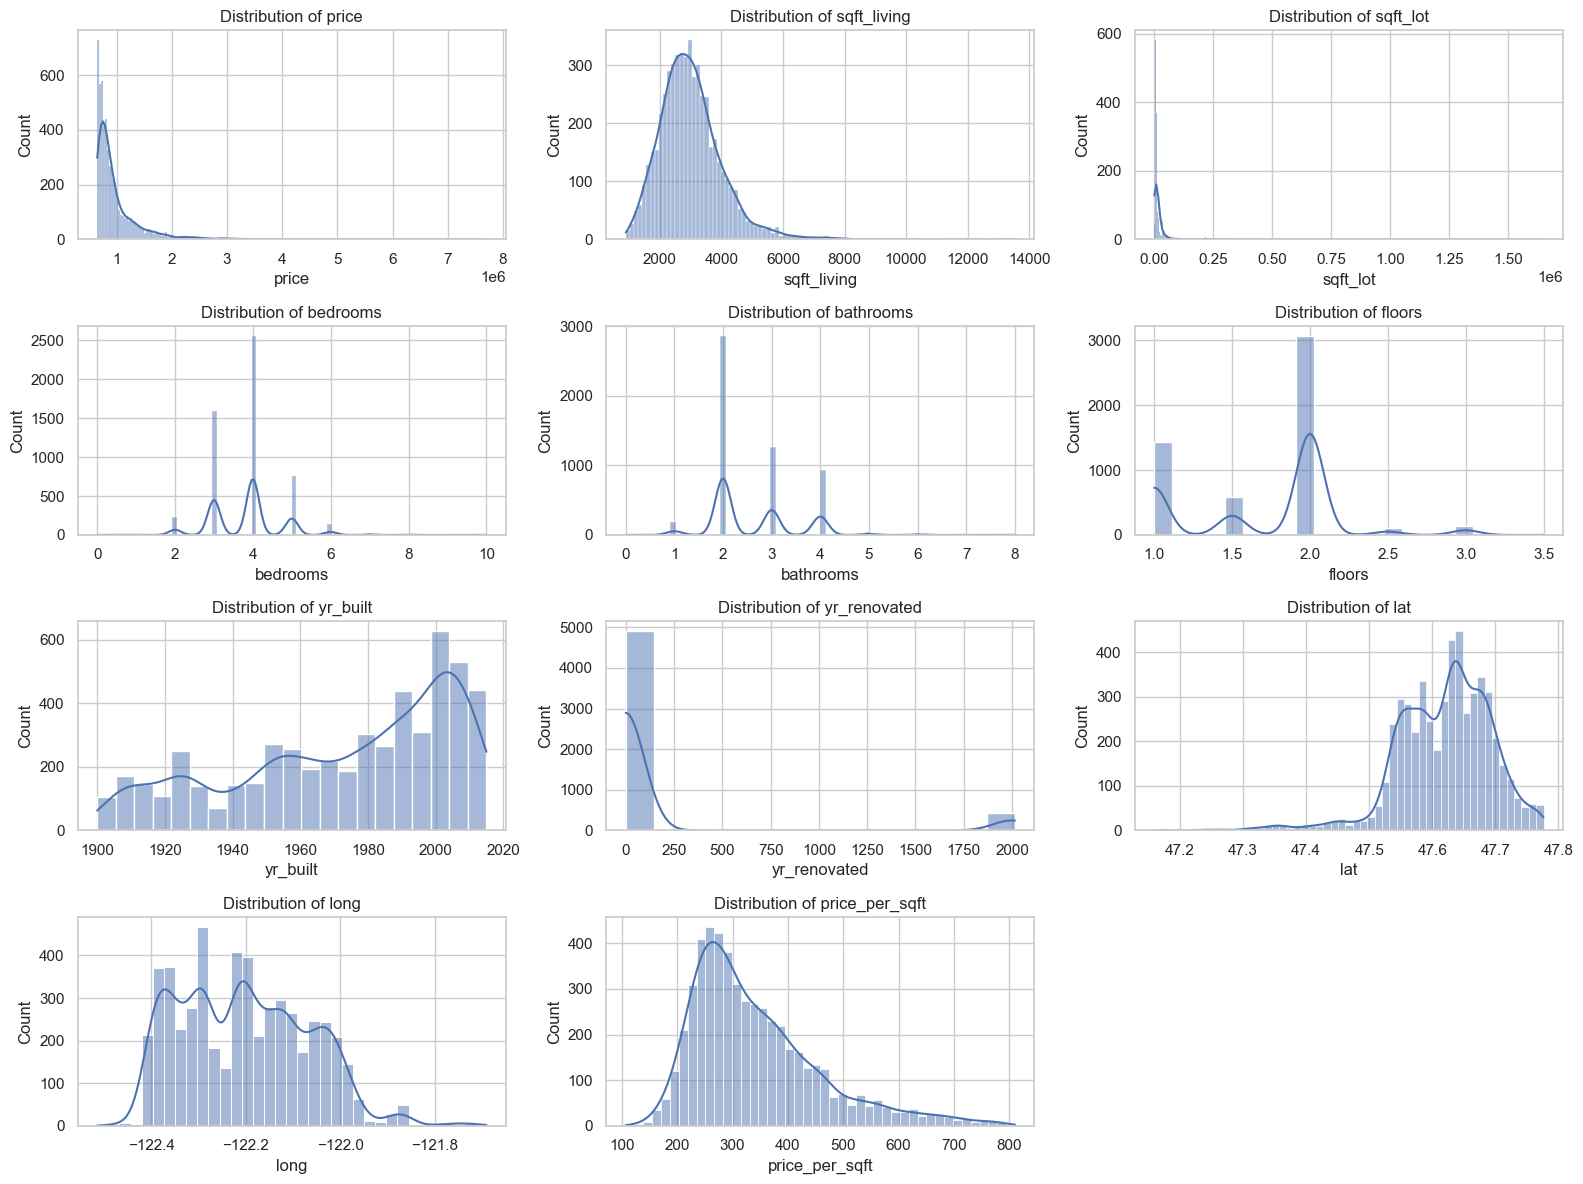

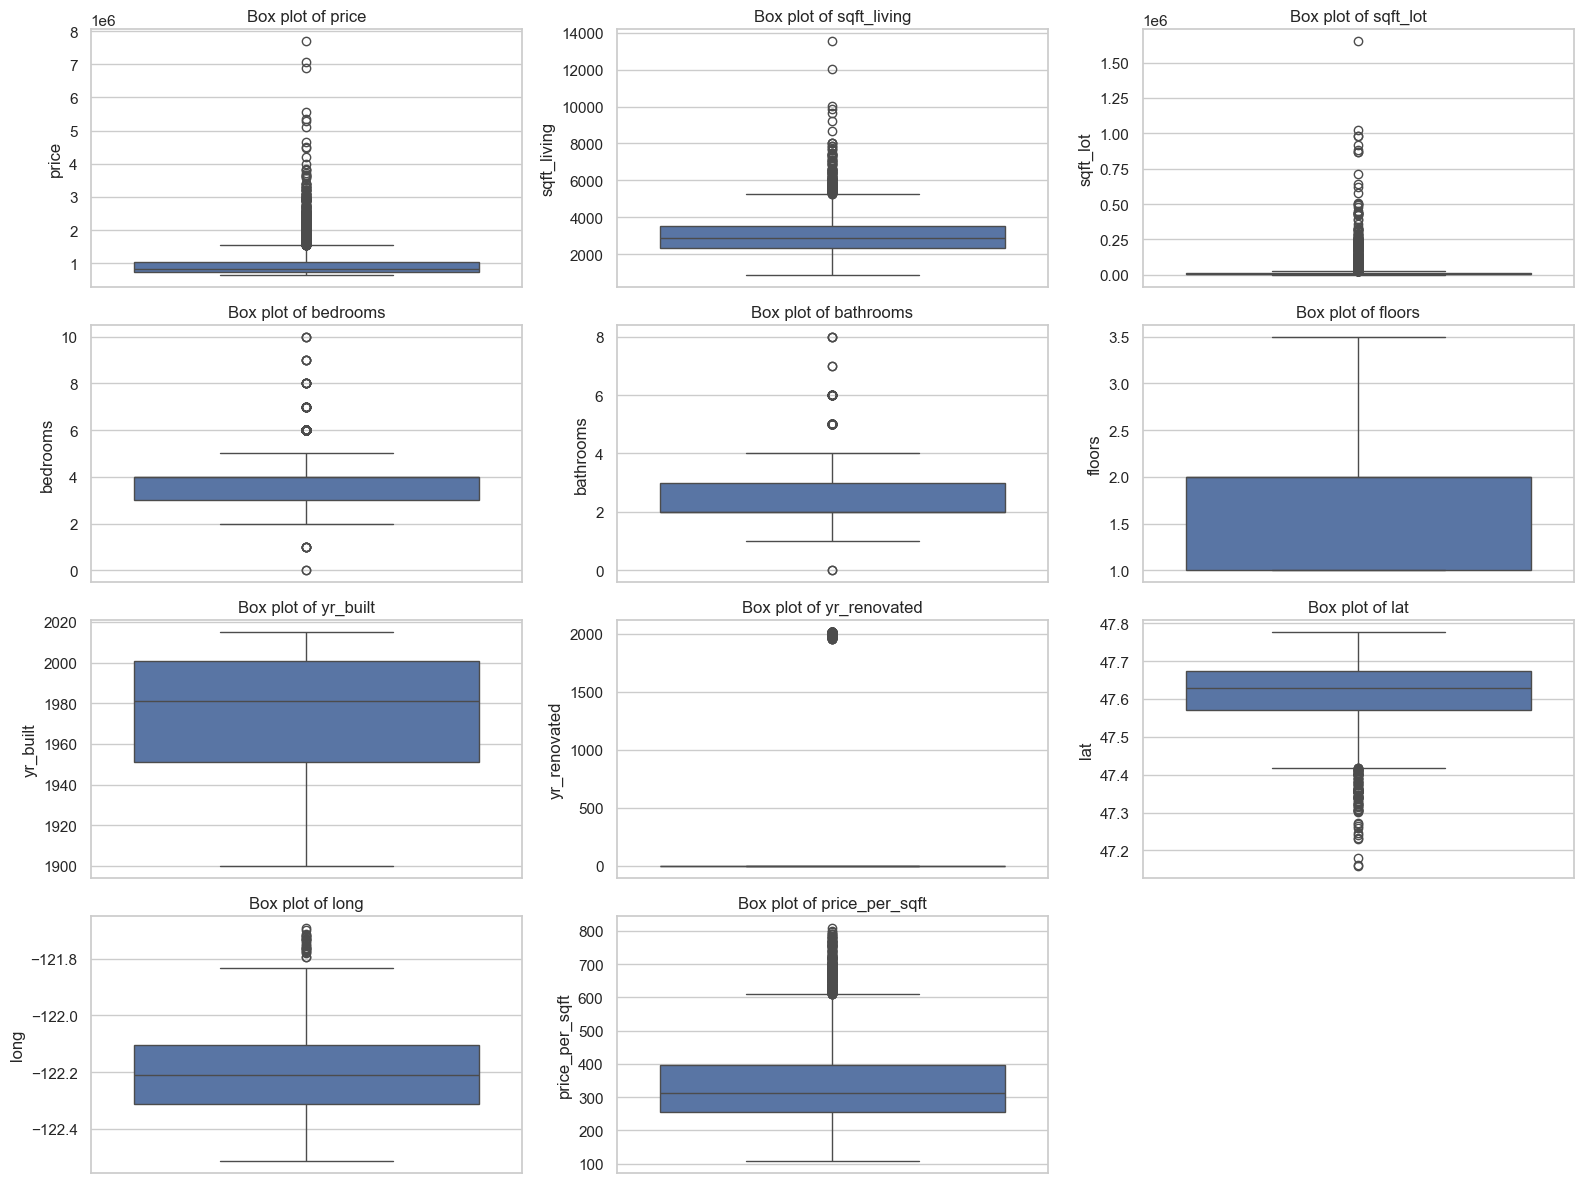

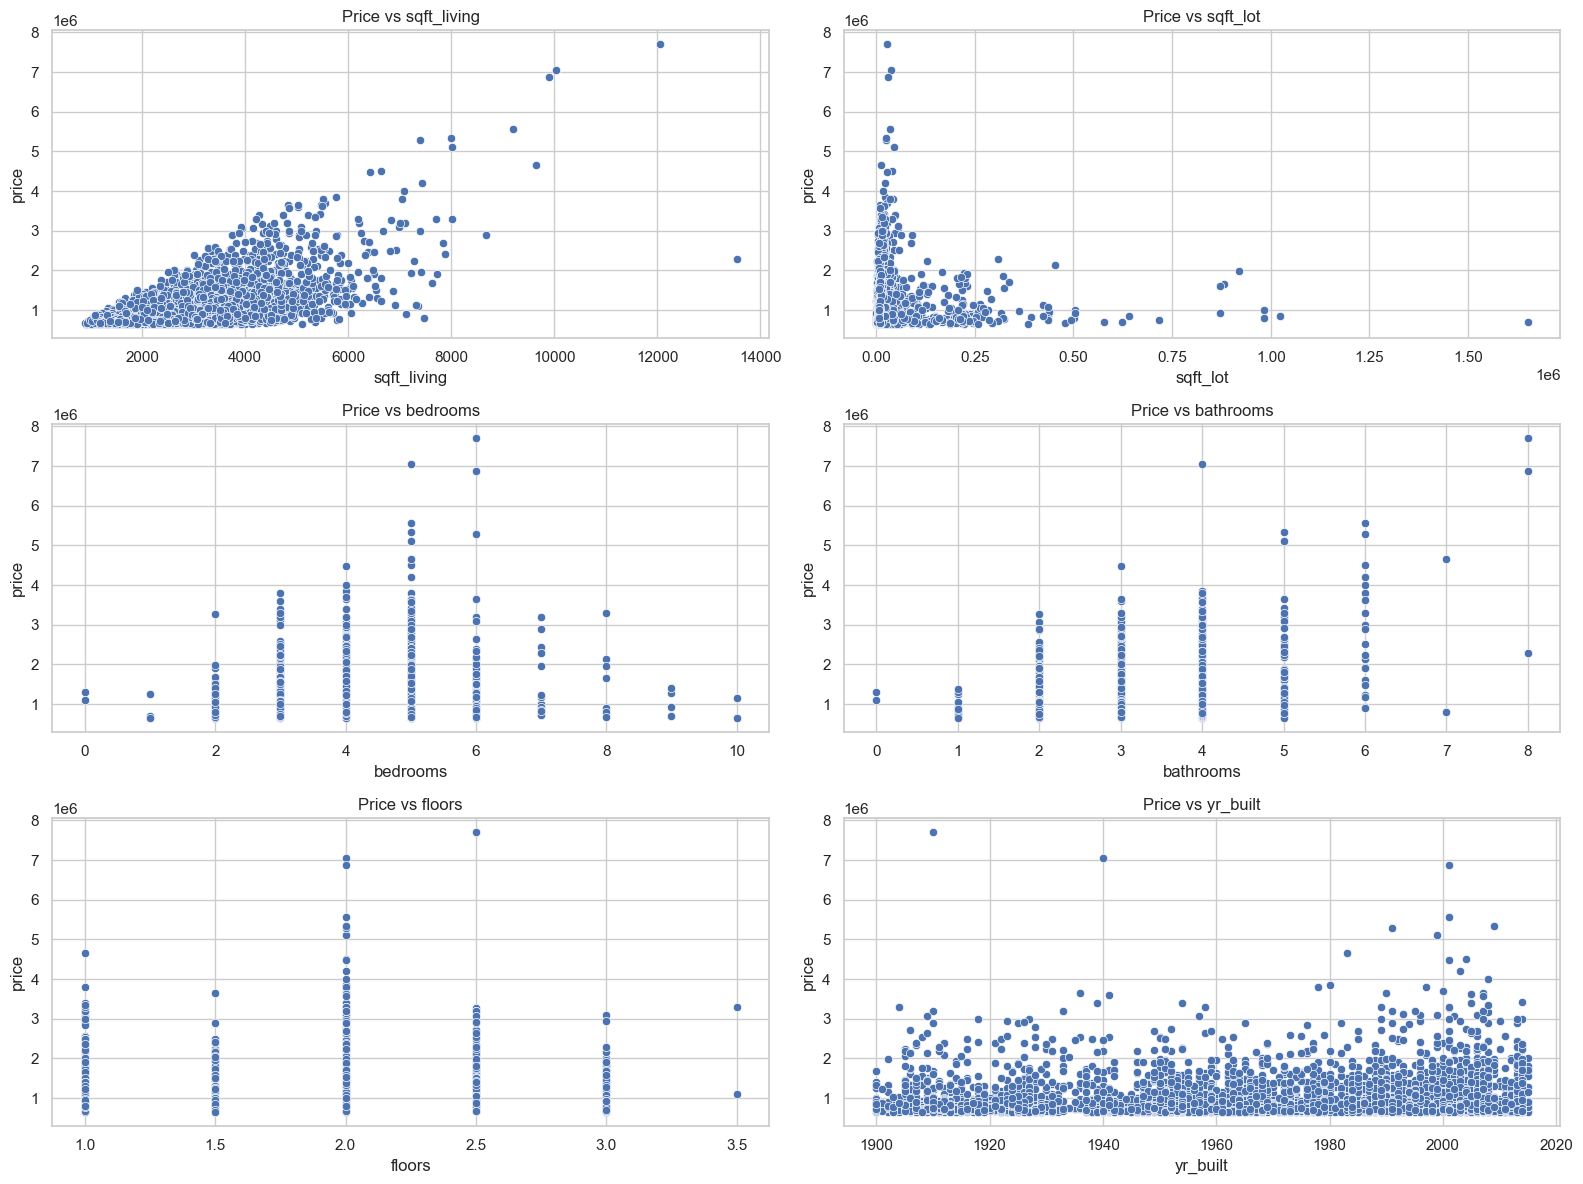

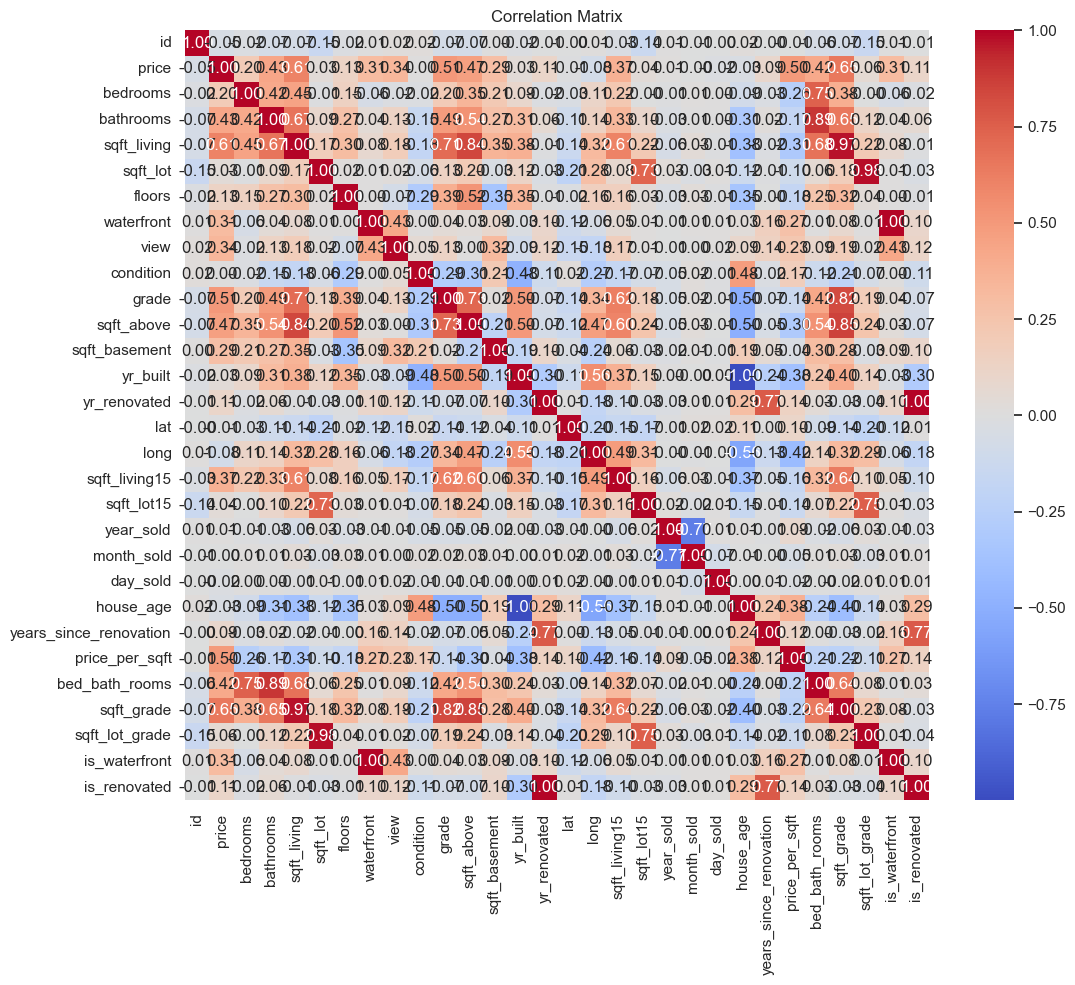

In [8]:
sns.set(style="whitegrid")

desc_stats =high_value_properties.describe()

cat_dist =high_value_properties['season_sold'].value_counts()

numerical_columns = ['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 'yr_built', 'yr_renovated', 'lat', 'long', 'price_per_sqft']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(high_value_properties[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=high_value_properties[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 12))
for i, col in enumerate(['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 'yr_built'], 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=high_value_properties[col], y=high_value_properties['price'])
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

numeric_data = high_value_properties.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



In [9]:
numeric_columns = high_value_properties.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr().abs()
high_corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]  

high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.8].reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

high_corr_pairs


,Feature1,Feature2,Correlation
0,yr_renovated,is_renovated,0.999981
1,is_renovated,yr_renovated,0.999981
2,house_age,yr_built,0.999897
3,yr_built,house_age,0.999897
4,sqft_lot,sqft_lot_grade,0.981854
5,sqft_lot_grade,sqft_lot,0.981854
6,sqft_grade,sqft_living,0.972581
7,sqft_living,sqft_grade,0.972581
8,bathrooms,bed_bath_rooms,0.891830
9,bed_bath_rooms,bathrooms,0.891830


In [11]:
columns_to_drop = [
    'is_renovated', 'house_age', 'sqft_grade', 'sqft_lot_grade', 
    'sqft_lot15', 'bed_bath_rooms', 'sqft_above'
]

data_reduced =high_value_properties.drop(columns=columns_to_drop)
remaining_columns = data_reduced.columns


In [10]:
data_reduced.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,year_sold,month_sold,day_sold,season_sold,years_since_renovation,price_per_sqft,is_waterfront
15,9297300055,2015-01-24,650000.0,4,3,2950,5000,2.0,0,3,...,47.5714,-122.375,2140,2015,1,24,Winter,0,220.338983,0
26,1794500383,2014-06-26,937000.0,3,2,2450,2691,2.0,0,0,...,47.6386,-122.360,1760,2014,6,26,Summer,0,382.448980,0
27,3303700376,2014-12-01,667000.0,3,1,1400,1581,1.5,0,0,...,47.6221,-122.314,1860,2014,12,1,Winter,0,476.428571,0
29,1873100390,2015-03-02,719000.0,4,2,2570,7173,2.0,0,0,...,47.7073,-122.110,2630,2015,3,2,Spring,0,279.766537,0
32,461000390,2014-06-24,687500.0,4,2,2330,5000,1.5,0,0,...,47.6823,-122.368,1460,2014,6,24,Summer,0,295.064378,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
X = data_reduced.drop(columns=['price', 'date', 'id', 'season_sold'])
y = data_reduced['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}
for name, model in models.items():
    model.fit(X_train, y_train)
model_performance_rmse = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    model_performance_rmse[name] = {'RMSE': rmse, 'R2': r2}

model_performance_rmse


{'Linear Regression': {'RMSE': 81410.62207784316, 'R2': 0.8418809325517624},
 'Ridge Regression': {'RMSE': 81421.44670587298, 'R2': 0.841838881678435},
 'Lasso Regression': {'RMSE': 81410.22042540293, 'R2': 0.8418824927597794},
 'Random Forest': {'RMSE': 14856.084416871001, 'R2': 0.9947346067207359},
 'Gradient Boosting': {'RMSE': 24197.294837376303, 'R2': 0.9860313083638831}}

In [2]:
from sklearn.model_selection import cross_val_score

def calculate_metrics(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    
    return {
        'Train RMSE': train_rmse,
        'Train R2': train_r2,
        'Test RMSE': test_rmse,
        'Test R2': test_r2
    }

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

model_performance = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    model_performance[name] = calculate_metrics(model, X_train, y_train, X_test, y_test)

cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    mean_cv_rmse = np.mean(cv_rmse_scores)
    std_cv_rmse = np.std(cv_rmse_scores)
    cv_results[name] = {
        'Mean CV RMSE': mean_cv_rmse,
        'Std CV RMSE': std_cv_rmse
    }


model_performance, cv_results


NameError: name 'LinearRegression' is not defined

In [3]:
columns_to_drop = ['waterfront', 'yr_renovated', 'house_age', 'sqft_lot_grade', 'sqft_grade', 'bed_bath_rooms', 'sqft_above']
data_reduced = data_no_outliers.drop(columns=columns_to_drop)


NameError: name 'data_no_outliers' is not defined

In [1]:

for name, model in models.items():
    model.fit(X_train, y_train)

# Normalize and display feature importances for linear models
def normalize_importances(coefficients):
    total_importance = np.sum(np.abs(coefficients))
    return np.abs(coefficients) / total_importance

linear_models = ["Linear Regression", "Ridge Regression", "Lasso Regression"]
for name in linear_models:
    coefficients = models[name].coef_
    normalized_importances = normalize_importances(coefficients)
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': normalized_importances
    }).sort_values(by='Importance', ascending=False)
    print(f"{name} Feature Importances:")
    print(importance_df)
    print()

NameError: name 'models' is not defined